# Other Models Ran:

Below is the Code and Output for many of my other models that I did not want to use/keep in the final result notebook for cleanliness:

In [148]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, columns, description, w = None, _C=1.0):
    model = LogisticRegression(C=_C, class_weight = w, fit_intercept = True, penalty = 'l2', random_state = 123).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('Accuracy Score with', description, 'model/features', score)
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    
    print("Our learned model parameter vector 'w': ", abs(model.coef_[0]))
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_axes([0,0,1,1])
    labels = columns
    coefficients = abs(model.coef_[0])
    ax.bar(labels, coefficients)
    plt.title("Bar Graph of Elements of the Learned Model Parameter Vector 'w'")
    plt.xlabel('Features')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.ylabel('Coefficients')
    plt.show()
    
    A = dict(zip(labels, coefficients))
    newA = dict(Counter(A).most_common(5))

    file1 = open("summary2.txt", "a")  # append mode
    file1.write(description+ '\t'+str(columns)+'\t LR \t'+str(score)+ '\t'+ str(newA.keys())+ '\t w='+str(w)+'\t C='+str(_C)+'\n')
    file1.close()
    
    report = classification_report(y_test, y_pred,output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data2/Results/LogisticRegression{description}.csv')
    return model

In [535]:
def simple_svm_classify(X_tr, y_tr, X_test, y_test, description, w = None, _C=1.0):
    svmClassifier = svm.SVC(kernel='rbf', class_weight = w, C = _C, random_state = 123).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('Accuracy Score with', description, 'model/features', score)
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')

    file1 = open("summary2.txt", "a")  # append mode
    file1.write(description+'\t SVM \t'+str(score)+ '\t w='+str(w)+ '\n')
    file1.close()
    
    report = classification_report(y_test, y_pred,output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data2/Results/SupportVectorMachine{description}.csv')
    return svmClassifier

In [556]:
def simple_svm_classify2(X_tr, y_tr, X_test, y_test, description, w = None, _C = 1.0):
    svmClassifier = svm.SVC(kernel='rbf', class_weight = w, C = _C, random_state = 123).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('SVM Accuracy Score with', description, 'model/features', score)
    return score

In [557]:
def simple_logistic_classify2(X_tr, y_tr, X_test, y_test, description, w = None, _C=1.0):
    model = LogisticRegression(C=_C, class_weight = w, fit_intercept = True, penalty = 'l2', random_state = 123).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('LR Accuracy Score with', description, 'model/features', score)
    return score

In [705]:
def simple_svmLin_classify2(X_tr, y_tr, X_test, y_test, description, w = None, _C = 1,los='squared_hinge', dua = True):
    svmClassifier = svm.LinearSVC(random_state = 123, class_weight = w, C = _C,loss = los,dual = dua).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('SVM Accuracy Score with', description, 'model/features', score)
    return score

In [701]:
def simple_svmNonLin_classify2(X_tr, y_tr, X_test, y_test, description, w = None, NU = .5, kern = 'rbf', deg = 3, gam = 'auto'):
    svmClassifier = svm.NuSVC(gamma=gam, random_state = 123, class_weight = w, nu = NU, kernel = kern, degree = deg,).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('SVM Accuracy Score with', description, 'model/features', score,w,NU,kern,deg,gam)
    return score

In [558]:
def simple_knn_classify(X_tr, y_tr, X_test, y_test, description, neighbors = 5, w = 'uniform'):
    model = KNeighborsClassifier(n_neighbors=neighbors, weights=w, n_jobs = -1).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('KNN Accuracy Score with', description, 'model/features', score)
    return score

In [559]:
def simple_sGradDes_classify(X_tr, y_tr, X_test, y_test, description, w = None):
    model = SGDClassifier(loss = 'log_loss', class_weight = w, n_jobs = -1, random_state = 123, penalty = 'l2', fit_intercept = True, shuffle = True).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('SGradDec Accuracy Score with', description, 'model/features', score)
    return score

In [574]:
def simple_dTree_classify(X_tr, y_tr, X_test, y_test, description, criter = 'log_loss', w = None):
    model = DecisionTreeClassifier(criterion = criter, class_weight = w, random_state = 123).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('DTree Accuracy Score with', description, 'model/features', score)
    return score

In [604]:
def simple_rForest_classify(X_tr, y_tr, X_test, y_test, description, estimators = 100, criter = 'log_loss', w = None, depth = None, feat = 'auto', split = 2, leaf = 1):
    model = RandomForestClassifier(n_estimators = estimators, criterion = criter, n_jobs = -1, class_weight = w, random_state = 123, max_depth = depth, max_features = feat, min_samples_split = split, min_samples_leaf = leaf).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    #print('RandFor Accuracy Score with', description, 'model/features', score, ": ", estimators, criter, depth, feat, split, leaf)
    return score

In [591]:
def simple_adaboost_classify(X_tr, y_tr, X_test, y_test, description, estimators = 50):
    model = AdaBoostClassifier(n_estimators = estimators, random_state = 123).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('AdaB Accuracy Score with', description, 'model/features', score)
    return score

In [592]:
def simple_xgboost_classify(X_tr, y_tr, X_test, y_test, description):
    model = XGBClassifier(verbosity = 0, random_state=123).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('XGBoost Accuracy Score with', description, 'model/features', score)
    return score

train: 4077, val: 724
(4077, 21)
(724, 21)
Logistic Regression:
Accuracy Score with simpletrain_df3 model/features 0.6160220994475138
Confusion Matrix: 
[[105 257]
 [ 21 341]]
Area Under Curve: 0.6160220994475138
Recall Score: 0.9419889502762431
Precision Score: 0.5702341137123745
Our learned model parameter vector 'w':  [0.22780545 0.28512768 1.01363292 0.83633673 1.03452604 0.26787657
 0.47220469 4.74666105 1.8289141  0.09803577 0.34281749 0.42333022
 0.63597363 0.25074559 0.13813244 0.33949569 1.54057865 0.77745613
 0.1570416  0.03649356 0.04866985]


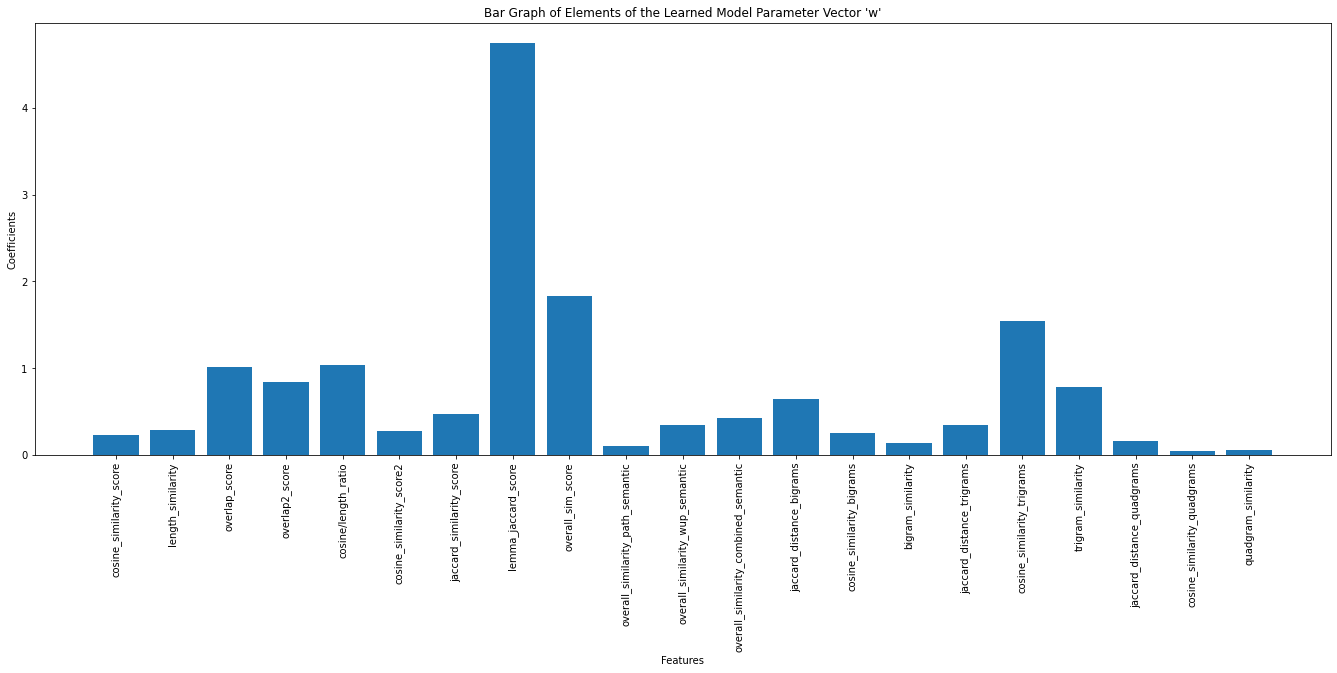

SVM:
Accuracy Score with simpletrain_df3 model/features 0.5704419889502762
Confusion Matrix: 
[[ 65 297]
 [ 14 348]]
Area Under Curve: 0.5704419889502763
Recall Score: 0.9613259668508287
Precision Score: 0.5395348837209303
train: 2243, val: 724
(2243, 21)
(724, 21)
Logistic Regression:
Accuracy Score with simpletrain_df3_removed model/features 0.6781767955801105
Confusion Matrix: 
[[258 104]
 [129 233]]
Area Under Curve: 0.6781767955801105
Recall Score: 0.643646408839779
Precision Score: 0.6913946587537092
Our learned model parameter vector 'w':  [3.22606837 1.85487723 0.92557952 1.99079165 3.97410132 1.28885147
 4.20176458 5.7403916  3.74366922 0.30429645 1.61533993 0.98296417
 2.14910381 2.5767849  1.33609879 1.42564218 2.0644149  1.06326458
 0.68013279 0.99228924 0.51814314]


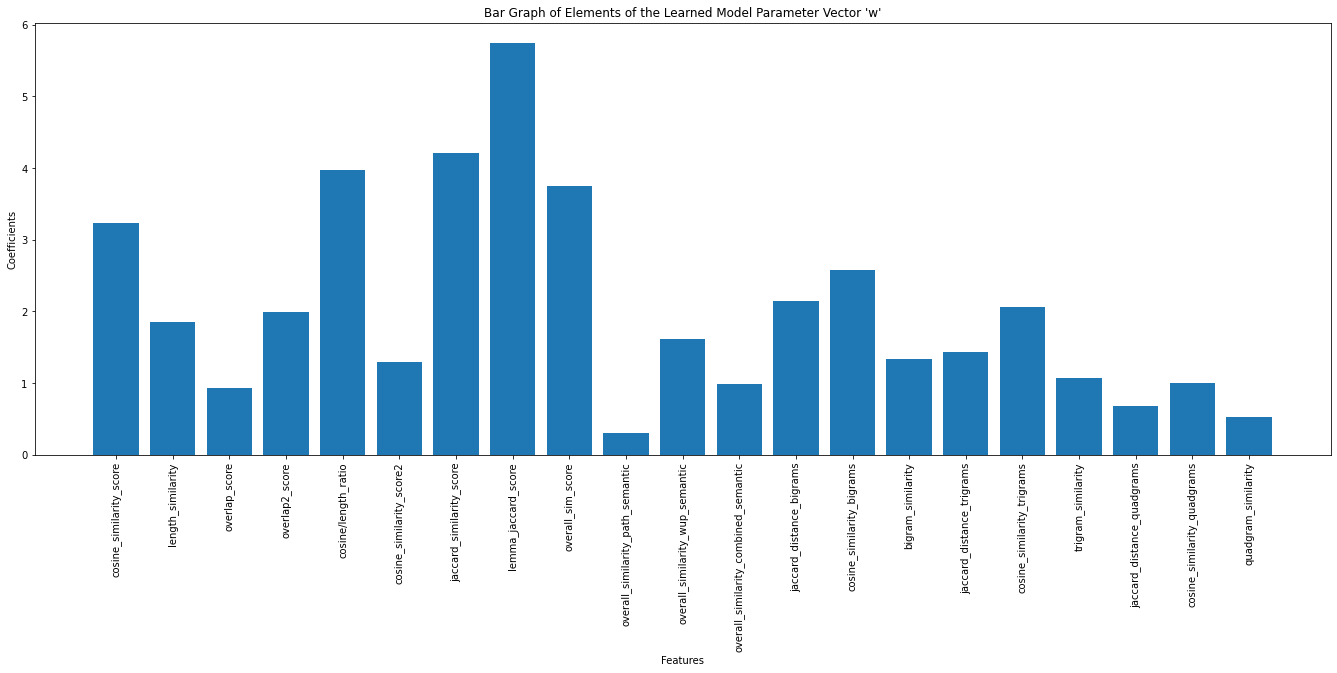

SVM:
Accuracy Score with simpletrain_df3_removed model/features 0.6850828729281768
Confusion Matrix: 
[[249 113]
 [115 247]]
Area Under Curve: 0.6850828729281767
Recall Score: 0.6823204419889503
Precision Score: 0.6861111111111111
train: 4077, val: 724
(4077, 6)
(724, 6)
Logistic Regression:
Accuracy Score with simpletop6 model/features 0.6174033149171271
Confusion Matrix: 
[[105 257]
 [ 20 342]]
Area Under Curve: 0.6174033149171271
Recall Score: 0.9447513812154696
Precision Score: 0.5709515859766278
Our learned model parameter vector 'w':  [5.07260484 1.9386792  1.07698814 1.89955397 0.61380559 0.85289936]


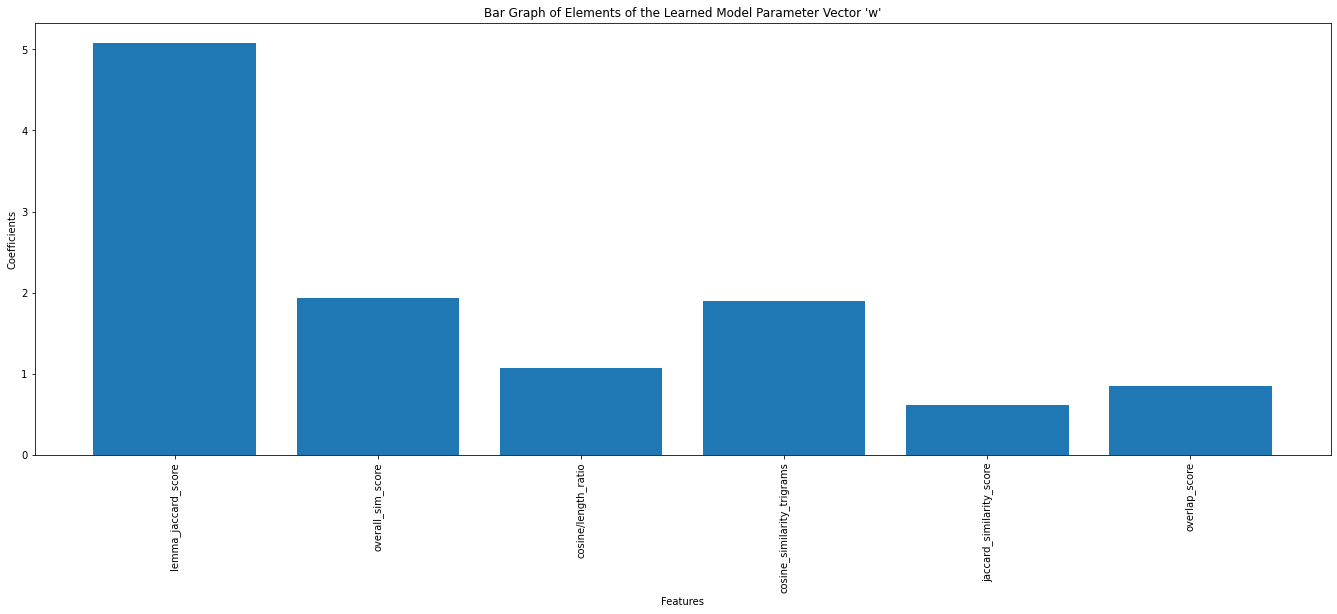

SVM:
Accuracy Score with simpletop6 model/features 0.5925414364640884
Confusion Matrix: 
[[ 74 288]
 [  7 355]]
Area Under Curve: 0.5925414364640884
Recall Score: 0.9806629834254144
Precision Score: 0.552099533437014
train: 2243, val: 724
(2243, 6)
(724, 6)
Logistic Regression:
Accuracy Score with simpletop6_no_outliers model/features 0.675414364640884
Confusion Matrix: 
[[233 129]
 [106 256]]
Area Under Curve: 0.675414364640884
Recall Score: 0.7071823204419889
Precision Score: 0.6649350649350649
Our learned model parameter vector 'w':  [7.50264984 4.94414165 5.65541031 5.27746796 5.71463159 1.03024765]


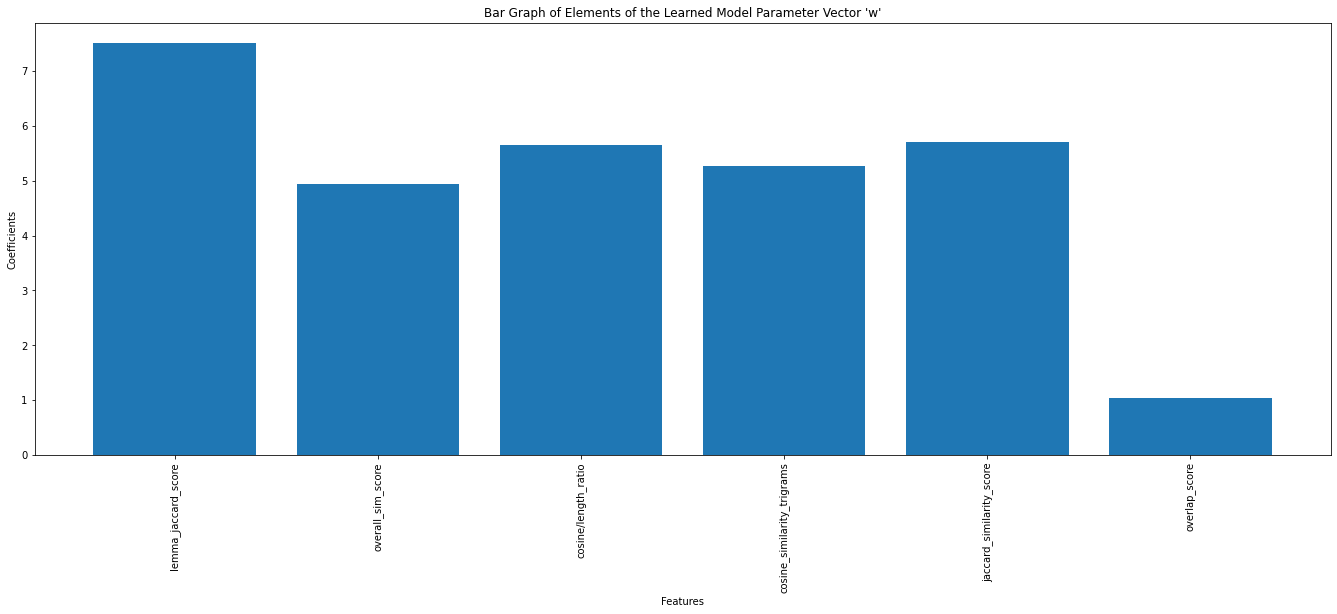

SVM:
Accuracy Score with simpletop6_no_outliers model/features 0.6837016574585635
Confusion Matrix: 
[[245 117]
 [112 250]]
Area Under Curve: 0.6837016574585635
Recall Score: 0.6906077348066298
Precision Score: 0.6811989100817438
train: 4077, val: 724
(4077, 10)
(724, 10)
Logistic Regression:
Accuracy Score with simpletop10 model/features 0.6270718232044199
Confusion Matrix: 
[[114 248]
 [ 22 340]]
Area Under Curve: 0.6270718232044199
Recall Score: 0.9392265193370166
Precision Score: 0.5782312925170068
Our learned model parameter vector 'w':  [4.74311621 1.83443824 0.8605047  1.74815782 0.42953662 0.99121699
 0.78655095 0.62253074 0.38155822 0.87696776]


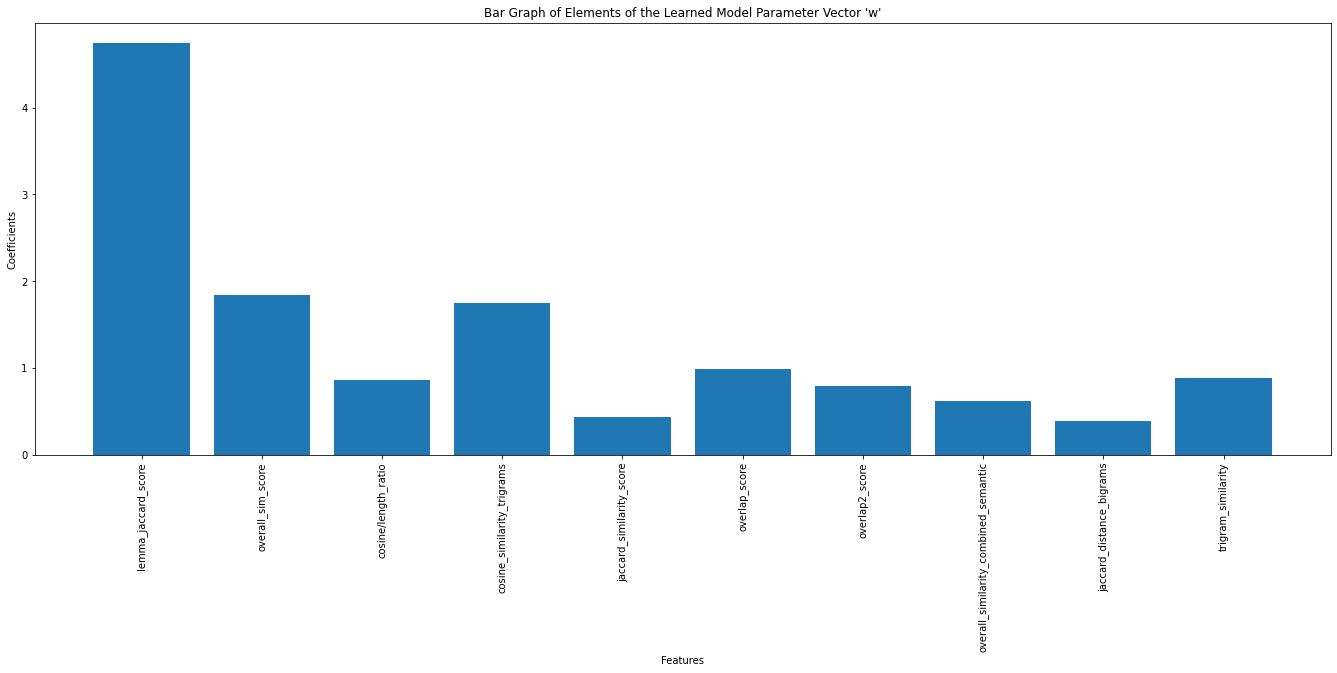

SVM:
Accuracy Score with simpletop10 model/features 0.5828729281767956
Confusion Matrix: 
[[ 68 294]
 [  8 354]]
Area Under Curve: 0.5828729281767956
Recall Score: 0.9779005524861878
Precision Score: 0.5462962962962963
train: 2243, val: 724
(2243, 10)
(724, 10)
Logistic Regression:
Accuracy Score with simpletop10_no_outliers model/features 0.6823204419889503
Confusion Matrix: 
[[241 121]
 [109 253]]
Area Under Curve: 0.6823204419889503
Recall Score: 0.6988950276243094
Precision Score: 0.6764705882352942
Our learned model parameter vector 'w':  [6.52437756 4.40203809 5.11206798 3.71398989 4.98099191 1.30018143
 2.40167026 2.14969124 3.35309513 1.89258259]


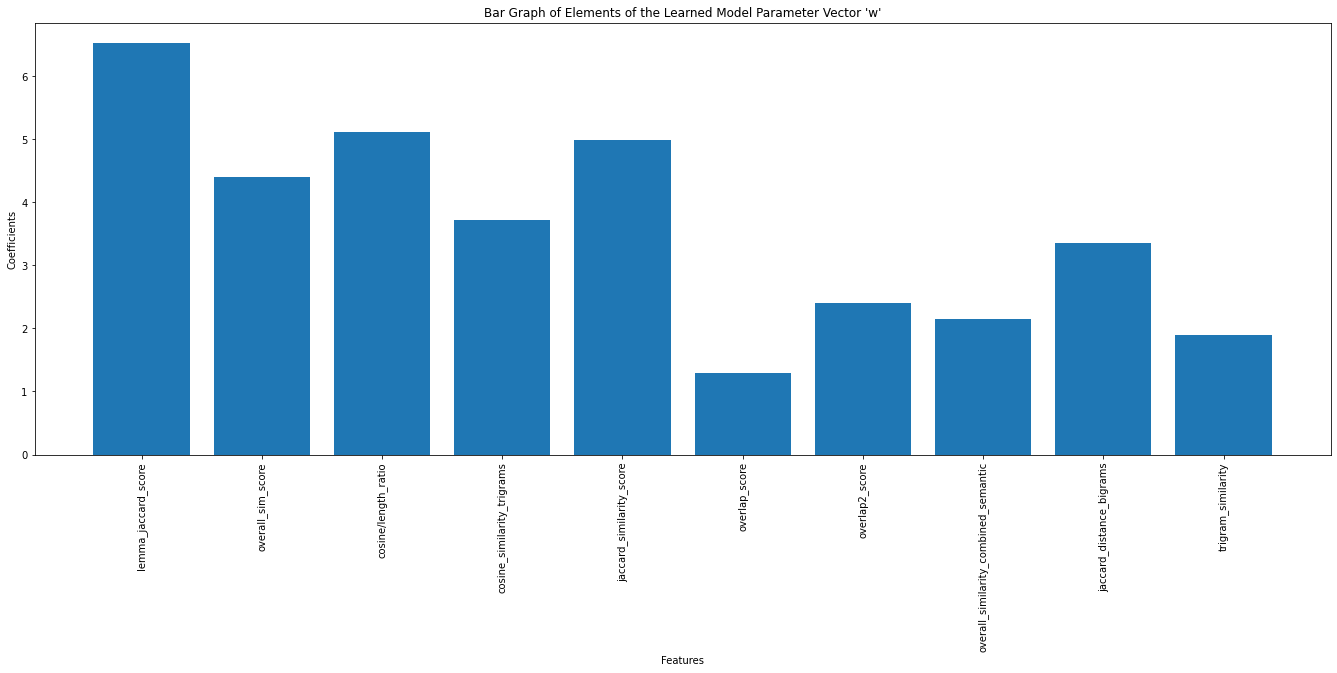

SVM:
Accuracy Score with simpletop10_no_outliers model/features 0.680939226519337
Confusion Matrix: 
[[242 120]
 [111 251]]
Area Under Curve: 0.680939226519337
Recall Score: 0.6933701657458563
Precision Score: 0.6765498652291105


In [552]:
# Logistic Regression/SVM All Scores: train_df_3
dfs = [train_df3, train_df3_removed, top6, top6_no_outliers, top10, top10_no_outliers]
dev_dfs = [dev_df, dev_df, top6dev,top6_no_outliersdev,top10dev,top10_no_outliersdev]
names = ['train_df3', 'train_df3_removed', 'top6', 'top6_no_outliers', 'top10', 'top10_no_outliers']
i = 0
for df in dfs:
    name = 'simple'+names[i]
    x_train = df.drop(['classification'], axis=1).values
    y_train = df['classification'].values
    x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
    y_train_val = dev_dfs[i]['classification'].values
    print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
    print(x_train.shape)
    print(x_train_val.shape)
    print('Logistic Regression:')
    model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, df.drop(['classification'], axis=1).columns,name)
    print('SVM:')
    model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, name)
    i = i + 1

train: 4077, val: 724
(4077, 21)
(724, 21)
Logistic Regression:
Accuracy Score with simpletrain_df3 model/features 0.6339779005524862
Confusion Matrix: 
[[121 241]
 [ 24 338]]
Area Under Curve: 0.6339779005524862
Recall Score: 0.9337016574585635
Precision Score: 0.5837651122625216
Our learned model parameter vector 'w':  [0.46374337 0.71435865 1.24951998 1.30409016 0.59473344 0.0079232
 0.09820275 4.19050121 1.90322171 0.59131092 0.12032618 0.20397107
 0.17976155 1.07660309 1.15375272 0.12813649 0.10235848 0.01774074
 0.07273007 0.298114   0.40979632]


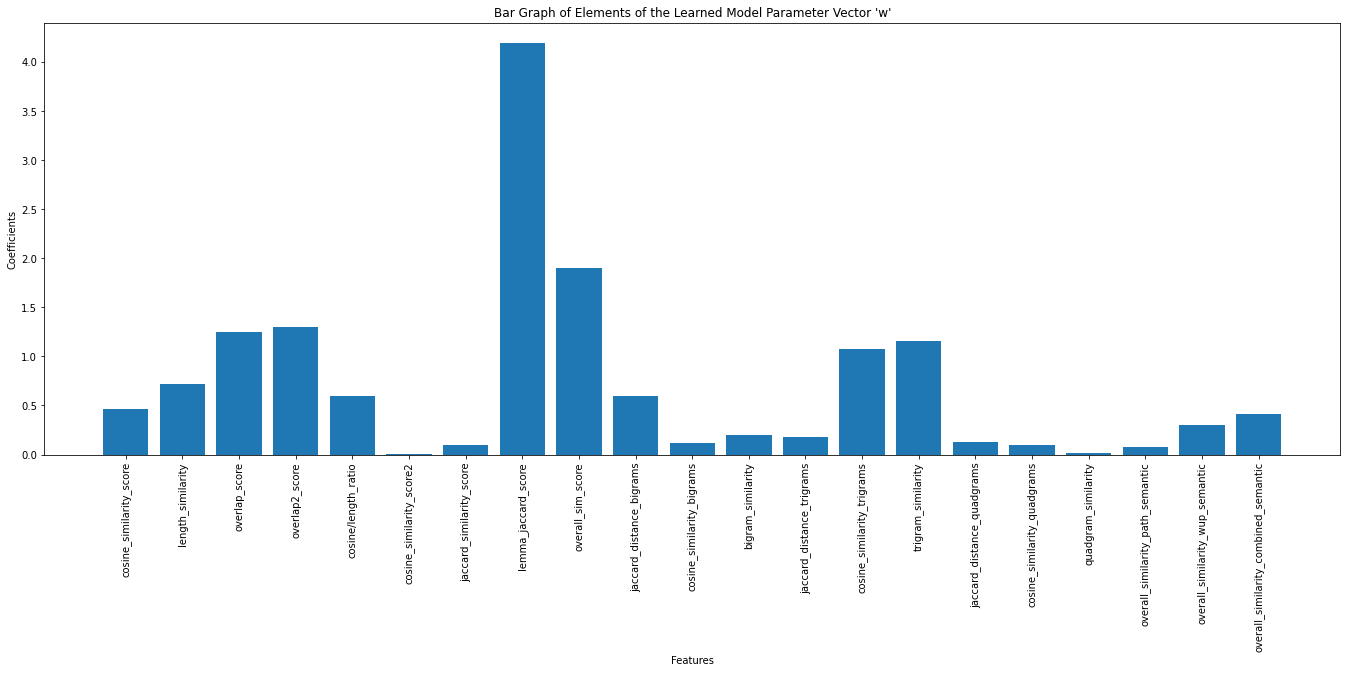

SVM:
Accuracy Score with simpletrain_df3 model/features 0.5566298342541437
Confusion Matrix: 
[[ 47 315]
 [  6 356]]
Area Under Curve: 0.5566298342541436
Recall Score: 0.9834254143646409
Precision Score: 0.5305514157973175
train: 2243, val: 724
(2243, 21)
(724, 21)
Logistic Regression:
Accuracy Score with simpletrain_df3_removed model/features 0.675414364640884
Confusion Matrix: 
[[225 137]
 [ 98 264]]
Area Under Curve: 0.6754143646408839
Recall Score: 0.7292817679558011
Precision Score: 0.6583541147132169
Our learned model parameter vector 'w':  [2.77048754 1.28597282 0.41924905 3.41833818 2.87919995 1.62832027
 3.38418539 5.05081147 4.2254194  1.59558094 1.92733202 1.98208648
 1.02825432 1.50292943 1.5330008  0.45591047 0.66306501 0.68521503
 0.30128517 1.4544855  0.89645404]


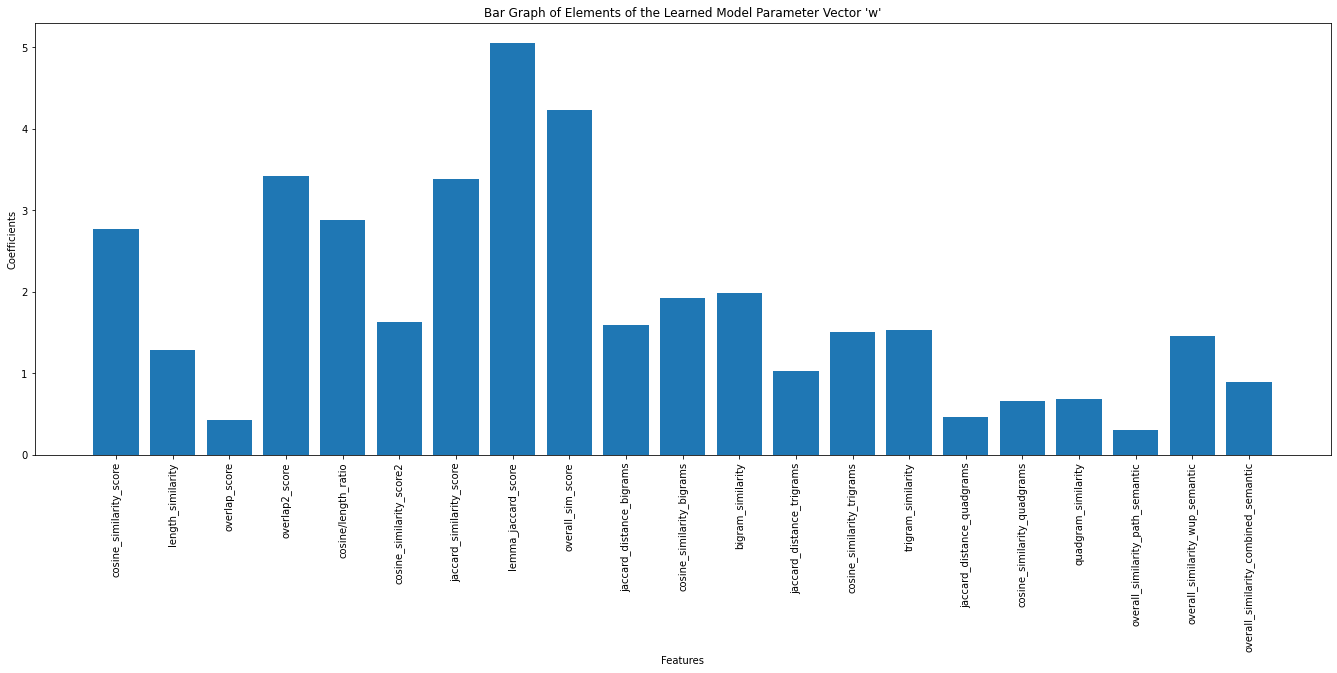

SVM:
Accuracy Score with simpletrain_df3_removed model/features 0.6781767955801105
Confusion Matrix: 
[[226 136]
 [ 97 265]]
Area Under Curve: 0.6781767955801106
Recall Score: 0.7320441988950276
Precision Score: 0.6608478802992519
train: 4077, val: 724
(4077, 10)
(724, 10)
Logistic Regression:
Accuracy Score with simpletop10 model/features 0.6367403314917127
Confusion Matrix: 
[[124 238]
 [ 25 337]]
Area Under Curve: 0.6367403314917127
Recall Score: 0.930939226519337
Precision Score: 0.5860869565217391
Our learned model parameter vector 'w':  [4.25594561 1.73000803 0.14487006 1.13497167 0.10913015 0.74046351
 1.14674545 0.42199322 1.18086088 0.59214301]


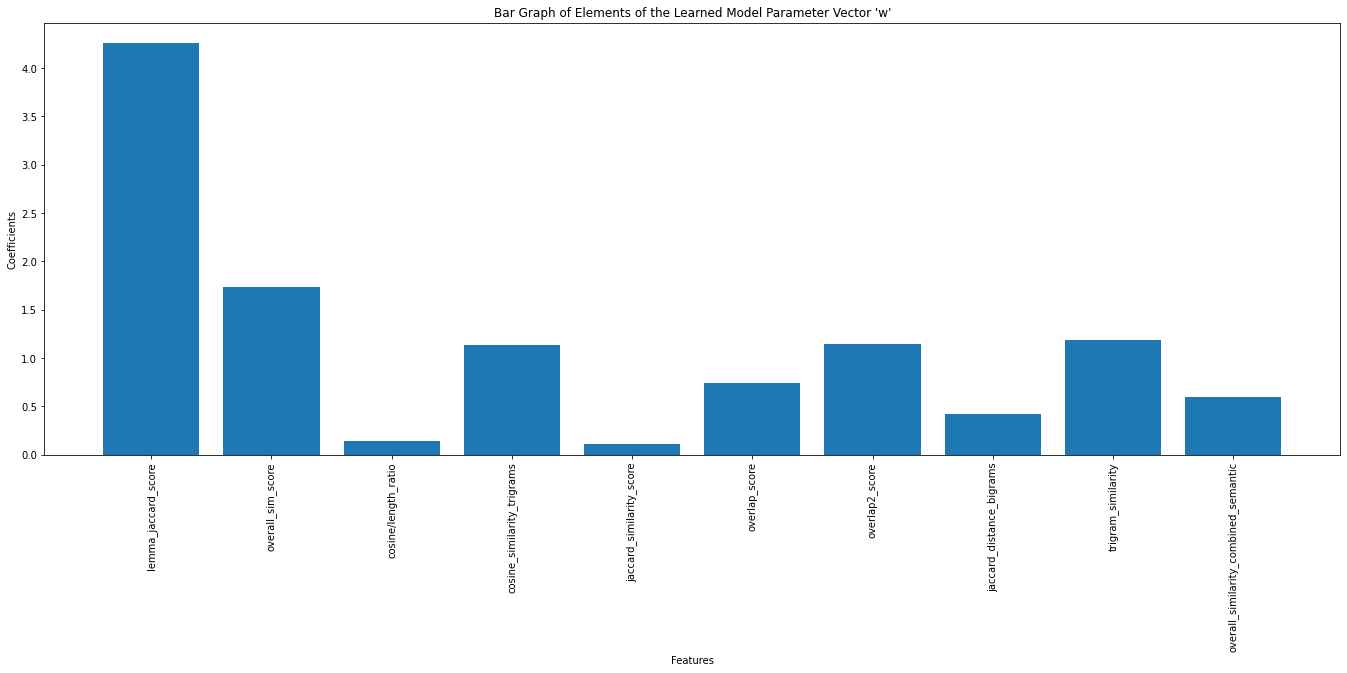

SVM:
Accuracy Score with simpletop10 model/features 0.580110497237569
Confusion Matrix: 
[[ 67 295]
 [  9 353]]
Area Under Curve: 0.580110497237569
Recall Score: 0.9751381215469613
Precision Score: 0.5447530864197531
train: 2243, val: 724
(2243, 10)
(724, 10)
Logistic Regression:
Accuracy Score with simpletop10_no_outliers model/features 0.669889502762431
Confusion Matrix: 
[[223 139]
 [100 262]]
Area Under Curve: 0.669889502762431
Recall Score: 0.7237569060773481
Precision Score: 0.6533665835411472
Our learned model parameter vector 'w':  [5.63917983 5.00260994 3.91117049 2.70566216 3.86007166 1.46435421
 4.00256741 2.52718532 2.74809622 1.822813  ]


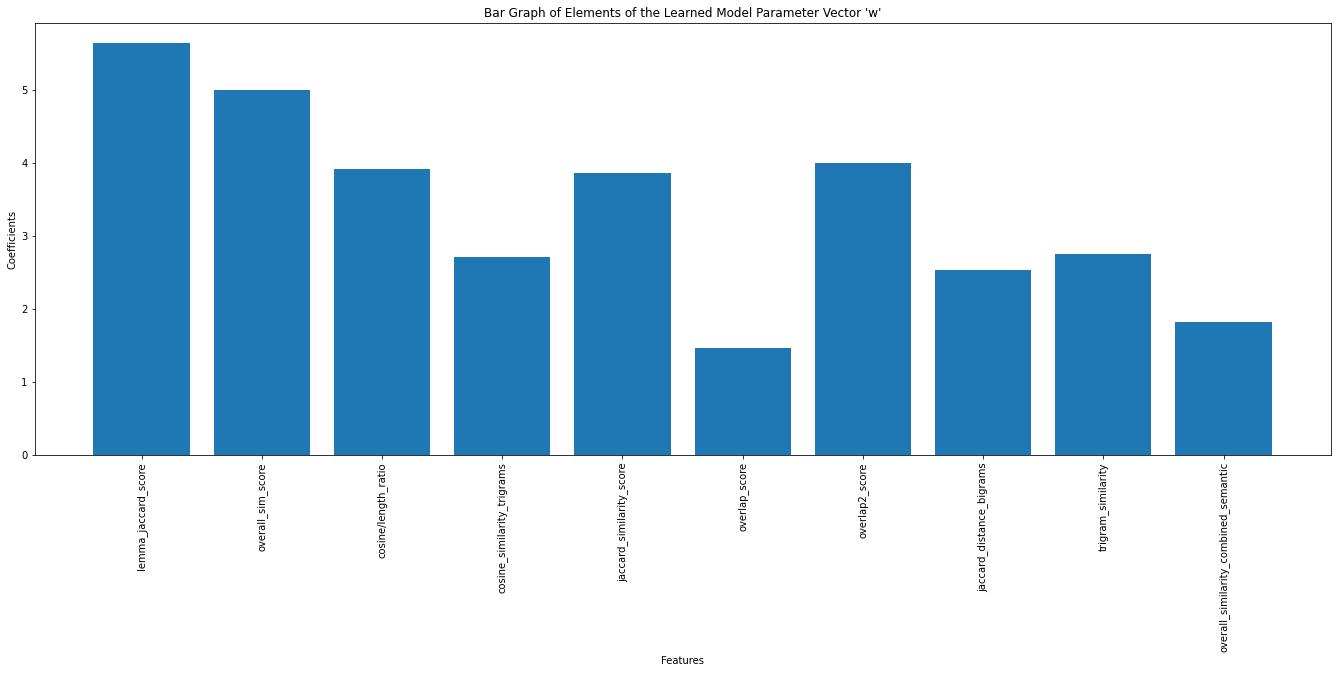

SVM:
Accuracy Score with simpletop10_no_outliers model/features 0.6767955801104972
Confusion Matrix: 
[[232 130]
 [104 258]]
Area Under Curve: 0.6767955801104971
Recall Score: 0.712707182320442
Precision Score: 0.6649484536082474


In [580]:
# Logistic Regression/SVM All Scores: train_df_3
i = 0
for df in normalizedDfs:
    name = 'simple'+names[i]
    x_train = df.drop(['classification'], axis=1).values
    y_train = df['classification'].values
    x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
    y_train_val = normalizedDevs[i]['classification'].values
    print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
    print(x_train.shape)
    print(x_train_val.shape)
    print('Logistic Regression:')
    model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, df.drop(['classification'], axis=1).columns,name)
    print('SVM:')
    model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, name)
    i = i + 1

## More Types of Models:

In [562]:
normalizedDfs = [dfs2[0],dfs2[1],dfs2[7],dfs2[8]]
normalizedDevs = [dfs2[2],dfs2[2],dfs2[9],dfs2[10]]
names = ['train_df3', 'train_df3_removed','top10', 'top10_no_outliers']
originalDfs = [train_df3,train_df3_removed,top10,top10_no_outliers]
dev_dfs = [dev_df, dev_df,top10dev,top10_no_outliersdev]
names2 = ['train_df3', 'train_df3_removed','top10', 'top10_no_outliers']

In [581]:
# All Models:
i = 0
#Non-Normalized:
for df in originalDfs:
    name = 'simple_'+names[i]
    x_train = df.drop(['classification'], axis=1).values
    y_train = df['classification'].values
    x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
    y_train_val = dev_dfs[i]['classification'].values
    
    model_simple = simple_logistic_classify2(x_train, y_train, x_train_val, y_train_val, name, w = None, _C=1.0)
    model_simple = simple_knn_classify(x_train, y_train, x_train_val, y_train_val, name, neighbors = 5, w = 'uniform')
    model_simple = simple_sGradDes_classify(x_train, y_train, x_train_val, y_train_val, name, w = None)
    model_simple = simple_dTree_classify(x_train, y_train, x_train_val, y_train_val, name, criter = 'log_loss', w = None)
    model_simple = simple_rForest_classify(x_train, y_train, x_train_val, y_train_val, name, estimators = 100, criter = 'log_loss', w = None)
    model_simple = simple_svm_classify2(x_train, y_train, x_train_val, y_train_val, name, w = None, _C = 1.0)
    
    i = i + 1

#Normalized:
for df in normalizedDfs:
    name = 'simple_'+names2[i]
    x_train = df.drop(['classification'], axis=1).values
    y_train = df['classification'].values
    x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
    y_train_val = normalizedDevs[i]['classification'].values
    
    model_simple = simple_logistic_classify2(x_train, y_train, x_train_val, y_train_val, name, w = None, _C=1.0)
    model_simple = simple_knn_classify(x_train, y_train, x_train_val, y_train_val, name, neighbors = 5, w = 'uniform')
    model_simple = simple_sGradDes_classify(x_train, y_train, x_train_val, y_train_val, name, w = None)
    model_simple = simple_dTree_classify(x_train, y_train, x_train_val, y_train_val, name, criter = 'log_loss', w = None)
    model_simple = simple_rForest_classify(x_train, y_train, x_train_val, y_train_val, name, estimators = 100, criter = 'log_loss', w = None)
    model_simple = simple_svm_classify2(x_train, y_train, x_train_val, y_train_val, name, w = None, _C = 1.0)
    
    i = i + 1
        

LR Accuracy Score with simple_train_df3 model/features 0.6160220994475138
KNN Accuracy Score with simple_train_df3 model/features 0.6408839779005525
SGradDec Accuracy Score with simple_train_df3 model/features 0.6450276243093923
DTree Accuracy Score with simple_train_df3 model/features 0.574585635359116
Accuracy Score with simple_train_df3 model/features 0.6602209944751382
SVM Accuracy Score with simple_train_df3 model/features 0.5704419889502762
LR Accuracy Score with simple_train_df3_removed model/features 0.6781767955801105
KNN Accuracy Score with simple_train_df3_removed model/features 0.6726519337016574
SGradDec Accuracy Score with simple_train_df3_removed model/features 0.6850828729281768
DTree Accuracy Score with simple_train_df3_removed model/features 0.6947513812154696
Accuracy Score with simple_train_df3_removed model/features 0.6919889502762431
SVM Accuracy Score with simple_train_df3_removed model/features 0.6850828729281768
LR Accuracy Score with simple_top10 model/feature

In [589]:
# All Ensemble Models:
i = 0
#Non-Normalized:
for df in originalDfs:
    name = 'simple_'+names[i]
    x_train = df.drop(['classification'], axis=1).values
    y_train = df['classification'].values
    x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
    y_train_val = dev_dfs[i]['classification'].values
    
    model_simple = simple_xgboost_classify(x_train, y_train, x_train_val, y_train_val, name,)
    model_simple = simple_adaboost_classify(x_train, y_train, x_train_val, y_train_val, name, estimators = 50)
    model_simple = simple_rForest_classify(x_train, y_train, x_train_val, y_train_val, name, estimators = 100, criter = 'log_loss', w = None)
    #model_simple = simple_svm_classify2(x_train, y_train, x_train_val, y_train_val, name, w = None, _C = 1.0)
    
    i = i + 1
i = 0
#Normalized:
for df in normalizedDfs:
    name = 'simple_'+names2[i]
    x_train = df.drop(['classification'], axis=1).values
    y_train = df['classification'].values
    x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
    y_train_val = normalizedDevs[i]['classification'].values
    
    model_simple = simple_xgboost_classify(x_train, y_train, x_train_val, y_train_val, name,)
    model_simple = simple_adaboost_classify(x_train, y_train, x_train_val, y_train_val, name, estimators = 50)
    model_simple = simple_rForest_classify(x_train, y_train, x_train_val, y_train_val, name, estimators = 100, criter = 'log_loss', w = None)
    #model_simple = simple_svm_classify2(x_train, y_train, x_train_val, y_train_val, name, w = None, _C = 1.0)
    
    i = i + 1
        

Accuracy Score with simple_train_df3 model/features 0.6298342541436464
Accuracy Score with simple_train_df3 model/features 0.580110497237569
RandFor Accuracy Score with simple_train_df3 model/features 0.6602209944751382
Accuracy Score with simple_train_df3_removed model/features 0.6947513812154696
Accuracy Score with simple_train_df3_removed model/features 0.6947513812154696
RandFor Accuracy Score with simple_train_df3_removed model/features 0.6919889502762431
Accuracy Score with simple_top10 model/features 0.6201657458563536
Accuracy Score with simple_top10 model/features 0.5966850828729282
RandFor Accuracy Score with simple_top10 model/features 0.6367403314917127
Accuracy Score with simple_top10_no_outliers model/features 0.6947513812154696
Accuracy Score with simple_top10_no_outliers model/features 0.6947513812154696
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6919889502762431
Accuracy Score with simple_train_df3 model/features 0.6215469613259669
Accuracy S

## Models with Adjustments, Normalized:

In [472]:
i = 0
for df in dfsNormalized:
    name = 'All'+names[i]
    X = df.drop(['classification'], axis=1).values
    y = df['classification'].values
    x_train_val = devsNormalized[i].drop(['classification'], axis=1).values
    y_train_val = devsNormalized[i]['classification'].values
    
    # summarize class distribution
    print(Counter(y))
    under = EditedNearestNeighbours(n_neighbors=3)
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))

    print('Logistic Regression:')
#     model_simple = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, w={1:.376, 0:0.624})
    model_simple = simple_logistic_classify2(X, y, x_train_val, y_train_val, name)
    print('SVM:')
#     model_simple2 = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w={1:.376, 0:0.624})
    model_simple2 = simple_svm_classify2(X, y, x_train_val, y_train_val, name)
    print(model_simple2)
    i = i + 1

Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 1705, 0.0: 1039})
Logistic Regression:
Accuracy Score with Alltrain_df3 model/features 0.7058011049723757
Confusion Matrix: 
[[268  94]
 [119 243]]
Area Under Curve: 0.7058011049723758
Recall Score: 0.6712707182320442
Precision Score: 0.7210682492581603
SVM:
0.6947513812154696
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 1715, 0.0: 1039})
Logistic Regression:
Accuracy Score with Alltrain_df3_removed model/features 0.7030386740331491
Confusion Matrix: 
[[271  91]
 [124 238]]
Area Under Curve: 0.7030386740331491
Recall Score: 0.6574585635359116
Precision Score: 0.723404255319149
SVM:
0.7044198895027625


In [506]:
i = 0
numsOver = [.4,.45,.5,.6,.7]
numsUnder = [.85,.9,.925,.95,.975,'majority']
for df in dfsNormalized:
    for numO in numsOver:
        for numU in numsUnder:
            average = 0
            for j in range(0,25):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = devsNormalized[i].drop(['classification'], axis=1).values
                y_train_val = devsNormalized[i]['classification'].values    
                over = SMOTE(sampling_strategy=numO,random_state=ri(0, 1000))
                X, y = over.fit_resample(X, y)
                under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
                X, y = under.fit_resample(X, y)
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name)
                average = average + score
            print("Average Score: ", average/25, numO, numU)
    i = i + 1

Average Score:  0.7091160220994475 0.4 0.85
Average Score:  0.7081767955801104 0.4 0.9
Average Score:  0.7060773480662982 0.4 0.925
Average Score:  0.7081215469613259 0.4 0.95
Average Score:  0.708232044198895 0.4 0.975
Average Score:  0.7060220994475139 0.4 majority
Average Score:  0.7061878453038674 0.45 0.85
Average Score:  0.7092265193370166 0.45 0.9
Average Score:  0.7095027624309392 0.45 0.925
Average Score:  0.7070718232044197 0.45 0.95
Average Score:  0.7049171270718233 0.45 0.975
Average Score:  0.7055248618784529 0.45 majority
Average Score:  0.7062430939226519 0.5 0.85
Average Score:  0.7081215469613259 0.5 0.9
Average Score:  0.7086187845303868 0.5 0.925
Average Score:  0.7092817679558011 0.5 0.95
Average Score:  0.7072928176795581 0.5 0.975
Average Score:  0.7053591160220996 0.5 majority
Average Score:  0.7056906077348067 0.6 0.85
Average Score:  0.7086740331491714 0.6 0.9
Average Score:  0.7075138121546959 0.6 0.925
Average Score:  0.7087845303867405 0.6 0.95
Average Scor

In [539]:
i = 0
numsOver = [.4,.5,.6,.7]
numsUnder = [.85,.9,.925,.95,.975,'majority']
ws = [{0:1,1:1}, {0:.55,1:0.45}, {0:1.25,1:1}]
Cvals = [10**(-1),.5, 1, 2, 5, 10,100]
for df in dfsNormalized:
    for numO in numsOver:
        for numU in numsUnder:
            for theW in ws:
                for theC in Cvals:
                    average = 0
                    for j in range(0,12):
                        name = 'All'+names[i]
                        X = df.drop(['classification'], axis=1).values
                        y = df['classification'].values
                        x_train_val = devsNormalized[i].drop(['classification'], axis=1).values
                        y_train_val = devsNormalized[i]['classification'].values    
                        over = SMOTE(sampling_strategy=numO,random_state=ri(0, 1000))
                        X, y = over.fit_resample(X, y)
                        under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
                        X, y = under.fit_resample(X, y)
                        score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                        average = average + score
                    print("Average Score: ", average/12, numO, numU, theW, theC)
    i = i + 1

Average Score:  0.6992403314917127 0.4 0.85 {0: 1, 1: 1} 0.1
Average Score:  0.707182320441989 0.4 0.85 {0: 1, 1: 1} 0.5
Average Score:  0.7049953959484346 0.4 0.85 {0: 1, 1: 1} 1
Average Score:  0.7055709023941068 0.4 0.85 {0: 1, 1: 1} 2
Average Score:  0.7054558011049724 0.4 0.85 {0: 1, 1: 1} 5
Average Score:  0.7049953959484346 0.4 0.85 {0: 1, 1: 1} 10
Average Score:  0.6726519337016575 0.4 0.85 {0: 1, 1: 1} 100
Average Score:  0.7010819521178636 0.4 0.85 {0: 0.55, 1: 0.45} 0.1
Average Score:  0.7039594843462247 0.4 0.85 {0: 0.55, 1: 0.45} 0.5
Average Score:  0.7021178637200736 0.4 0.85 {0: 0.55, 1: 0.45} 1
Average Score:  0.7034990791896868 0.4 0.85 {0: 0.55, 1: 0.45} 2
Average Score:  0.7090239410681399 0.4 0.85 {0: 0.55, 1: 0.45} 5
Average Score:  0.7115561694290976 0.4 0.85 {0: 0.55, 1: 0.45} 10
Average Score:  0.6982044198895028 0.4 0.85 {0: 0.55, 1: 0.45} 100
Average Score:  0.7023480662983426 0.4 0.85 {0: 1.25, 1: 1} 0.1
Average Score:  0.6998158379373849 0.4 0.85 {0: 1.25, 1

In [540]:
i = 0
numsOver = [.4,.5,.6,.7]
numsUnder = [.85,.9,.925,.95,.975,'majority']
ws = [{0:1,1:1}, {0:.55,1:0.45}]
Cvals = [10**(-1),.5, 1, 2, 5, 10,100]
for df in dfsNormalized:
    for numO in numsOver:
        for numU in numsUnder:
            for theW in ws:
                for theC in Cvals:
                    average = 0
                    for j in range(0,12):
                        name = 'All'+names[i]
                        X = df.drop(['classification'], axis=1).values
                        y = df['classification'].values
                        x_train_val = devsNormalized[i].drop(['classification'], axis=1).values
                        y_train_val = devsNormalized[i]['classification'].values    
                        over = RandomOverSampler(sampling_strategy=numO,random_state=ri(0, 1000))
                        X, y = over.fit_resample(X, y)
                        under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
                        X, y = under.fit_resample(X, y)
                        score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                        average = average + score
                    print("Average Score: ", average/12, numO, numU, theW, theC)
    i = i + 1

Average Score:  0.6980893186003683 0.4 0.85 {0: 1, 1: 1} 0.1
Average Score:  0.7092541436464089 0.4 0.85 {0: 1, 1: 1} 0.5
Average Score:  0.7068370165745858 0.4 0.85 {0: 1, 1: 1} 1
Average Score:  0.7064917127071823 0.4 0.85 {0: 1, 1: 1} 2
Average Score:  0.7084484346224679 0.4 0.85 {0: 1, 1: 1} 5
Average Score:  0.7054558011049723 0.4 0.85 {0: 1, 1: 1} 10
Average Score:  0.6732274401473296 0.4 0.85 {0: 1, 1: 1} 100
Average Score:  0.7018876611418049 0.4 0.85 {0: 0.55, 1: 0.45} 0.1
Average Score:  0.7017725598526704 0.4 0.85 {0: 0.55, 1: 0.45} 0.5
Average Score:  0.6997007366482505 0.4 0.85 {0: 0.55, 1: 0.45} 1
Average Score:  0.7032688766114181 0.4 0.85 {0: 0.55, 1: 0.45} 2
Average Score:  0.7107504604051567 0.4 0.85 {0: 0.55, 1: 0.45} 5
Average Score:  0.7122467771639043 0.4 0.85 {0: 0.55, 1: 0.45} 10
Average Score:  0.7001611418047883 0.4 0.85 {0: 0.55, 1: 0.45} 100
Average Score:  0.7062615101289134 0.4 0.9 {0: 1, 1: 1} 0.1
Average Score:  0.7083333333333334 0.4 0.9 {0: 1, 1: 1} 0.

In [542]:
i = 0
ws = [{0:1,1:1}, {0:.55,1:0.45}]
Cvals = [10**(-1),.5, 1, 2, 5, 10,100]
for df in dfsNormalized:
    for theW in ws:
        for theC in Cvals:
            average = 0
            for j in range(0,12):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = devsNormalized[i].drop(['classification'], axis=1).values
                y_train_val = devsNormalized[i]['classification'].values    
                over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
                X, y = over.fit_resample(X, y)
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                average = average + score
            print("Average Score: ", average/12, theW, theC)
    i = i + 1

Average Score:  0.7063766114180479 {0: 1, 1: 1} 0.1
Average Score:  0.7053406998158379 {0: 1, 1: 1} 0.5
Average Score:  0.7092541436464089 {0: 1, 1: 1} 1
Average Score:  0.7074125230202579 {0: 1, 1: 1} 2
Average Score:  0.7033839779005525 {0: 1, 1: 1} 5
Average Score:  0.6924493554327809 {0: 1, 1: 1} 10
Average Score:  0.6043968692449355 {0: 1, 1: 1} 100
Average Score:  0.6936003683241253 {0: 0.55, 1: 0.45} 0.1
Average Score:  0.6942909760589319 {0: 0.55, 1: 0.45} 0.5
Average Score:  0.694060773480663 {0: 0.55, 1: 0.45} 1
Average Score:  0.6994705340699815 {0: 0.55, 1: 0.45} 2
Average Score:  0.7021178637200737 {0: 0.55, 1: 0.45} 5
Average Score:  0.7023480662983426 {0: 0.55, 1: 0.45} 10
Average Score:  0.6460635359116023 {0: 0.55, 1: 0.45} 100
Average Score:  0.7048802946593001 {0: 1, 1: 1} 0.1
Average Score:  0.7075276243093924 {0: 1, 1: 1} 0.5
Average Score:  0.7075276243093923 {0: 1, 1: 1} 1
Average Score:  0.7048802946593001 {0: 1, 1: 1} 2
Average Score:  0.6911832412523019 {0: 1,

In [547]:
i = 0
ws = [{0:1,1:1}, {0:.55,1:0.45}, {0:.62,1:.38}]
Cvals = [10**(-1),.5,.75, 1, 2, 5, 10]
for df in dfsNormalized:
    for theW in ws:
        for theC in Cvals:
            average = 0
            average2 = 0
            for j in range(0,12):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = devsNormalized[i].drop(['classification'], axis=1).values
                y_train_val = devsNormalized[i]['classification'].values    
                under = EditedNearestNeighbours(n_neighbors=3)
                X, y = under.fit_resample(X, y)
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                score2 = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                average = average + score
                average2 = average2 + score2
            print("Average Score SVM: ", average/12, theW, theC)
            print("Average Score LR: ", average2/12, theW, theC)
    i = i + 1

Average Score SVM:  0.703038674033149 {0: 1, 1: 1} 0.1
Average Score LR:  0.7044198895027626 {0: 1, 1: 1} 0.1
Average Score SVM:  0.696132596685083 {0: 1, 1: 1} 0.5
Average Score LR:  0.7113259668508288 {0: 1, 1: 1} 0.5
Average Score SVM:  0.6947513812154699 {0: 1, 1: 1} 0.75
Average Score LR:  0.7085635359116021 {0: 1, 1: 1} 0.75
Average Score SVM:  0.6947513812154699 {0: 1, 1: 1} 1
Average Score LR:  0.7058011049723757 {0: 1, 1: 1} 1
Average Score SVM:  0.696132596685083 {0: 1, 1: 1} 2
Average Score LR:  0.696132596685083 {0: 1, 1: 1} 2
Average Score SVM:  0.6947513812154699 {0: 1, 1: 1} 5
Average Score LR:  0.6975138121546961 {0: 1, 1: 1} 5
Average Score SVM:  0.6975138121546961 {0: 1, 1: 1} 10
Average Score LR:  0.6988950276243094 {0: 1, 1: 1} 10
Average Score SVM:  0.7071823204419889 {0: 0.55, 1: 0.45} 0.1
Average Score LR:  0.7058011049723757 {0: 0.55, 1: 0.45} 0.1
Average Score SVM:  0.7058011049723757 {0: 0.55, 1: 0.45} 0.5
Average Score LR:  0.7071823204419889 {0: 0.55, 1: 0.4

In [ ]:
originalDfs = [train_df3,train_df3_removed,top10,top10_no_outliers]
dev_dfs = [dev_df, dev_df,top10dev,top10_no_outliersdev]
names = ['train_df3', 'train_df3_removed','top10', 'top10_no_outliers']

i = 0
numsOver = [.4,.5,.6,.7]
numsUnder = [.85,.9,.925,.95,.975,'majority']
ws = [{0:1,1:1}, {0:.55,1:0.45}]
Cvals = [10**(-1),.5, 1, 2, 5, 10,100]
for df in originalDfs:
    for numO in numsOver:
        for numU in numsUnder:
            for theW in ws:
                for theC in Cvals:
                    average = 0
                    for j in range(0,12):
                        name = 'All'+names[i]
                        X = df.drop(['classification'], axis=1).values
                        y = df['classification'].values
                        x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
                        y_train_val = dev_dfs[i]['classification'].values    
                        over = SMOTE(sampling_strategy=numO,random_state=ri(0, 1000))
                        X, y = over.fit_resample(X, y)
                        under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
                        X, y = under.fit_resample(X, y)
                        score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                        average = average + score
                    print("Average Score: ", average/12, numO, numU, theW, theC)
    i = i + 1

In [ ]:
i = 0
numsOver = [.4,.5,.6,.7]
numsUnder = [.85,.9,.925,.95,.975,'majority']
ws = [{0:1,1:1}, {0:.55,1:0.45}]
Cvals = [10**(-1),.5, 1, 2, 5, 10,100]
for df in originalDfs:
    for numO in numsOver:
        for numU in numsUnder:
            for theW in ws:
                for theC in Cvals:
                    average = 0
                    for j in range(0,12):
                        name = 'All'+names[i]
                        X = df.drop(['classification'], axis=1).values
                        y = df['classification'].values
                        x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
                        y_train_val = dev_dfs[i]['classification'].values    
                        over = RandomOverSampler(sampling_strategy=numO,random_state=ri(0, 1000))
                        X, y = over.fit_resample(X, y)
                        under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
                        X, y = under.fit_resample(X, y)
                        score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                        average = average + score
                    print("Average Score: ", average/12, numO, numU, theW, theC)
    i = i + 1

In [543]:
i = 0
ws = [{0:1,1:1}, {0:.55,1:0.45}]
Cvals = [10**(-1),.5, 1, 2, 5, 10,100]
for df in originalDfs:
    for theW in ws:
        for theC in Cvals:
            average = 0
            for j in range(0,12):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
                y_train_val = dev_dfs[i]['classification'].values    
                over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
                X, y = over.fit_resample(X, y)
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                average = average + score
            print("Average Score: ", average/12, theW, theC)
    i = i + 1

Average Score:  0.696938305709024 {0: 1, 1: 1} 0.1
Average Score:  0.6909530386740332 {0: 1, 1: 1} 0.5
Average Score:  0.6719613259668509 {0: 1, 1: 1} 1
Average Score:  0.6412292817679558 {0: 1, 1: 1} 2
Average Score:  0.6170580110497238 {0: 1, 1: 1} 5
Average Score:  0.6124539594843462 {0: 1, 1: 1} 10
Average Score:  0.632366482504604 {0: 1, 1: 1} 100
Average Score:  0.6673572744014734 {0: 0.55, 1: 0.45} 0.1
Average Score:  0.6889963167587477 {0: 0.55, 1: 0.45} 0.5
Average Score:  0.6872697974217311 {0: 0.55, 1: 0.45} 1
Average Score:  0.6788674033149172 {0: 0.55, 1: 0.45} 2
Average Score:  0.6361648250460404 {0: 0.55, 1: 0.45} 5
Average Score:  0.6246546961325966 {0: 0.55, 1: 0.45} 10
Average Score:  0.6285681399631675 {0: 0.55, 1: 0.45} 100
Average Score:  0.6808241252302025 {0: 1, 1: 1} 0.1
Average Score:  0.6824355432780846 {0: 1, 1: 1} 0.5
Average Score:  0.6860036832412524 {0: 1, 1: 1} 1
Average Score:  0.6887661141804787 {0: 1, 1: 1} 2
Average Score:  0.6916436464088398 {0: 1, 

In [546]:
i = 0
ws = [{0:1,1:1}, {0:.55,1:0.45}, {0:.62,1:.38}]
Cvals = [10**(-1),.5,.75, 1, 2, 5, 10]
for df in originalDfs:
    for theW in ws:
        for theC in Cvals:
            average = 0
            average2 = 0
            for j in range(0,12):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
                y_train_val = dev_dfs[i]['classification'].values    
                under = EditedNearestNeighbours(n_neighbors=3)
                X, y = under.fit_resample(X, y)
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                score2 = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                average = average + score
                average2 = average2 + score2
            print("Average Score SVM: ", average/12, theW, theC)
            print("Average Score LR: ", average2/12, theW, theC)
    i = i + 1

Average Score SVM:  0.6906077348066298 {0: 1, 1: 1} 0.1
Average Score LR:  0.6767955801104971 {0: 1, 1: 1} 0.1
Average Score SVM:  0.6988950276243094 {0: 1, 1: 1} 0.5
Average Score LR:  0.696132596685083 {0: 1, 1: 1} 0.5
Average Score SVM:  0.6975138121546961 {0: 1, 1: 1} 0.75
Average Score LR:  0.691988950276243 {0: 1, 1: 1} 0.75
Average Score SVM:  0.7016574585635357 {0: 1, 1: 1} 1
Average Score LR:  0.696132596685083 {0: 1, 1: 1} 1
Average Score SVM:  0.7113259668508288 {0: 1, 1: 1} 2
Average Score LR:  0.703038674033149 {0: 1, 1: 1} 2
Average Score SVM:  0.7002762430939226 {0: 1, 1: 1} 5
Average Score LR:  0.7154696132596685 {0: 1, 1: 1} 5
Average Score SVM:  0.6988950276243094 {0: 1, 1: 1} 10
Average Score LR:  0.7099447513812153 {0: 1, 1: 1} 10
Average Score SVM:  0.6823204419889503 {0: 0.55, 1: 0.45} 0.1
Average Score LR:  0.6574585635359115 {0: 0.55, 1: 0.45} 0.1
Average Score SVM:  0.6864640883977903 {0: 0.55, 1: 0.45} 0.5
Average Score LR:  0.6712707182320442 {0: 0.55, 1: 0.4

In [513]:
originalDfs = [train_df3,train_df3_removed,top10,top10_no_outliers]
dev_dfs = [dev_df, dev_df,top10dev,top10_no_outliersdev]
names = ['train_df3', 'train_df3_removed','top10', 'top10_no_outliers']

i = 0
ws = [{0:4,1:3}, {0:3,1:1}, {0:2,1:1}, {0:3, 1:2}, {0:1,1:1}, {0:.55,1:0.45}, {0:.60,1:.4},{0:75,1:25}, {0:76,1:24}, {0:1,1:.25}, {0:10,1:1.0}]
Cvals = [10**(-2),10**(-1),.5, 1, 1.5, 2, 5, 10,20]
for df in originalDfs:
    for theW in ws:
        for theC in Cvals:
            average = 0
            average2 = 0
            for j in range(0,8):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = dev_dfs[i].drop(['classification'], axis=1).values
                y_train_val = dev_dfs[i]['classification'].values    
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                score2 = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                average = average + score
                average2 = average2 + score2
            print("Average Score SVM: ", average/8, theW, theC)
            print("Average Score LR: ", average2/8, theW, theC)
    i = i + 1

Average Score SVM:  0.5386740331491713 {0: 4, 1: 3} 0.01
Average Score LR:  0.6712707182320442 {0: 4, 1: 3} 0.01
Average Score SVM:  0.6422651933701657 {0: 4, 1: 3} 0.1
Average Score LR:  0.6837016574585634 {0: 4, 1: 3} 0.1
Average Score SVM:  0.6491712707182319 {0: 4, 1: 3} 0.5
Average Score LR:  0.6519337016574586 {0: 4, 1: 3} 0.5
Average Score SVM:  0.6754143646408839 {0: 4, 1: 3} 1
Average Score LR:  0.6505524861878453 {0: 4, 1: 3} 1
Average Score SVM:  0.6837016574585634 {0: 4, 1: 3} 1.5
Average Score LR:  0.664364640883978 {0: 4, 1: 3} 1.5
Average Score SVM:  0.6933701657458562 {0: 4, 1: 3} 2
Average Score LR:  0.6878453038674034 {0: 4, 1: 3} 2
Average Score SVM:  0.6201657458563536 {0: 4, 1: 3} 5
Average Score LR:  0.6892265193370166 {0: 4, 1: 3} 5
Average Score SVM:  0.611878453038674 {0: 4, 1: 3} 10
Average Score LR:  0.6754143646408839 {0: 4, 1: 3} 10
Average Score SVM:  0.5939226519337016 {0: 4, 1: 3} 20
Average Score LR:  0.5759668508287293 {0: 4, 1: 3} 20
Average Score SVM

train: 4077, val: 724
(4077, 10)
(724, 10)
Accuracy Score with Alltop10_no_outliers model/features 0.6961325966850829
Confusion Matrix: 
[[274  88]
 [132 230]]
Area Under Curve: 0.6961325966850829
Recall Score: 0.6353591160220995
Precision Score: 0.7232704402515723
Our learned model parameter vector 'w':  [ 7.81016247  1.33563705  2.51324249  1.67590231  1.92761564  4.76365263
 11.73374547  0.70571149  0.5037078   1.76001751]


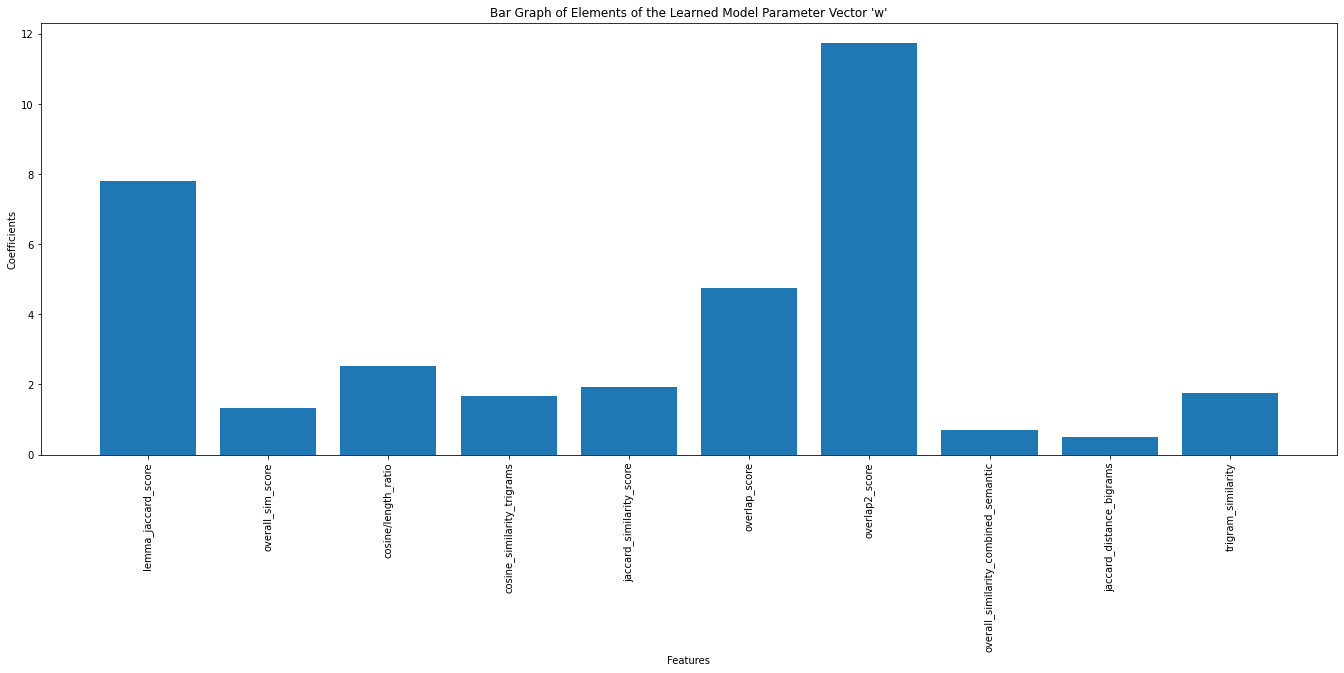

Logistic Regression: LogisticRegression(C=1, class_weight={0: 76, 1: 24}, random_state=123)
Accuracy Score with Alltop10_no_outliers model/features 0.7223756906077348
Confusion Matrix: 
[[291  71]
 [130 232]]
Area Under Curve: 0.7223756906077349
Recall Score: 0.6408839779005525
Precision Score: 0.7656765676567657
SVM: SVC(C=2, class_weight={0: 76, 1: 24}, random_state=123)


In [536]:
names = 'top10best'
x_train = top10.drop(['classification'], axis=1).values
y_train = top10['classification'].values
x_train_val = top10dev.drop(['classification'], axis=1).values
y_train_val = top10dev['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, top10.drop(['classification'], axis=1).columns, name, w = {0:76,1:24}, _C = 1)
print('Logistic Regression:', model_simple)
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, name, w = {0:76,1:24}, _C = 2)
print('SVM:', model_simple2)


train: 4077, val: 724
(4077, 10)
(724, 10)
Accuracy Score with Alltop10_no_outliers model/features 0.6906077348066298
Confusion Matrix: 
[[278  84]
 [140 222]]
Area Under Curve: 0.6906077348066298
Recall Score: 0.6132596685082873
Precision Score: 0.7254901960784313
Our learned model parameter vector 'w':  [7.45891659 1.87239153 3.84422178 0.09656007 2.3220349  3.22830716
 7.86424    0.6634095  2.56670177 0.74468162]


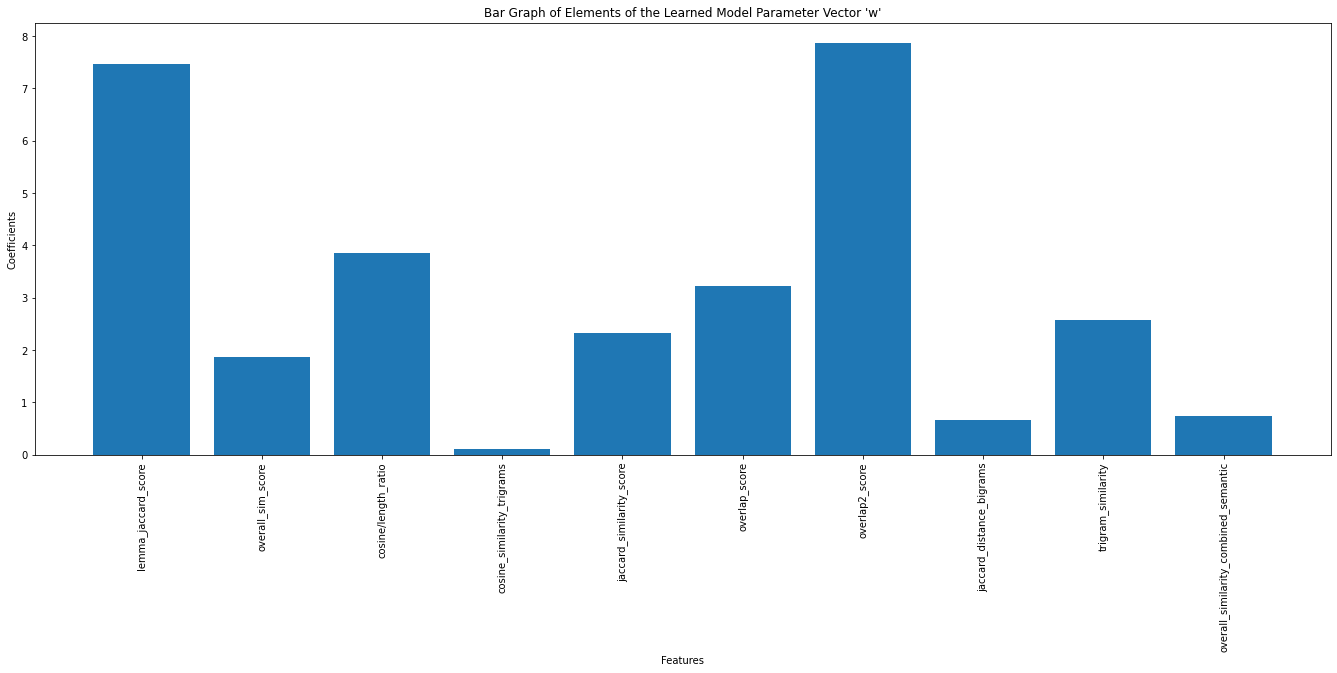

Logistic Regression: LogisticRegression(C=1, class_weight={0: 76, 1: 24}, random_state=123)
Accuracy Score with Alltop10_no_outliers model/features 0.7237569060773481
Confusion Matrix: 
[[295  67]
 [133 229]]
Area Under Curve: 0.723756906077348
Recall Score: 0.6325966850828729
Precision Score: 0.7736486486486487
SVM: SVC(C=0.5, class_weight={0: 76, 1: 24}, random_state=123)


In [538]:
names = 'top10bestnorm'
x_train = dfs2[7].drop(['classification'], axis=1).values
y_train = dfs2[7]['classification'].values
x_train_val = dfs2[9].drop(['classification'], axis=1).values
y_train_val = dfs2[9]['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, dfs2[7].drop(['classification'], axis=1).columns, name, w = {0:76,1:24}, _C = 1)
print('Logistic Regression:', model_simple)
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, name, w = {0:76,1:24}, _C = .5)
print('SVM:', model_simple2)


In [516]:

normalizedDfs = [dfs2[0],dfs2[1],dfs2[7],dfs2[8]]
normalizedDevs = [dfs2[2],dfs2[2],dfs2[9],dfs2[10]]
names = ['train_df3', 'train_df3_removed','top10', 'top10_no_outliers']

i = 0
ws = [{0:4,1:3}, {0:3,1:1}, {0:2,1:1}, {0:3, 1:2}, {0:1,1:1}, {0:.55,1:0.45}, {0:.60,1:.4},{0:75,1:25}, {0:76,1:24}, {0:1,1:.25}, {0:10,1:1.0}]
Cvals = [10**(-2),10**(-1),.5, 1, 1.5, 2, 5, 10,20]
for df in normalizedDfs:
    for theW in ws:
        for theC in Cvals:
            average = 0
            average2 = 0
            for j in range(0,8):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
                y_train_val = normalizedDevs[i]['classification'].values    
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                score2 = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                average = average + score
                average2 = average2 + score2
            print("Average Score SVM: ", average/8, theW, theC)
            print("Average Score LR: ", average2/8, theW, theC)
    i = i + 1

Average Score SVM:  0.5704419889502762 {0: 4, 1: 3} 0.01
Average Score LR:  0.611878453038674 {0: 4, 1: 3} 0.01
Average Score SVM:  0.6284530386740331 {0: 4, 1: 3} 0.1
Average Score LR:  0.6546961325966851 {0: 4, 1: 3} 0.1
Average Score SVM:  0.6395027624309392 {0: 4, 1: 3} 0.5
Average Score LR:  0.6823204419889503 {0: 4, 1: 3} 0.5
Average Score SVM:  0.6450276243093923 {0: 4, 1: 3} 1
Average Score LR:  0.680939226519337 {0: 4, 1: 3} 1
Average Score SVM:  0.6450276243093923 {0: 4, 1: 3} 1.5
Average Score LR:  0.680939226519337 {0: 4, 1: 3} 1.5
Average Score SVM:  0.643646408839779 {0: 4, 1: 3} 2
Average Score LR:  0.6767955801104972 {0: 4, 1: 3} 2
Average Score SVM:  0.6325966850828729 {0: 4, 1: 3} 5
Average Score LR:  0.6698895027624311 {0: 4, 1: 3} 5
Average Score SVM:  0.638121546961326 {0: 4, 1: 3} 10
Average Score LR:  0.664364640883978 {0: 4, 1: 3} 10
Average Score SVM:  0.6160220994475138 {0: 4, 1: 3} 20
Average Score LR:  0.6505524861878453 {0: 4, 1: 3} 20
Average Score SVM:  0

In [596]:
n_estimators = [100, 120, 150]
criterion = ['entropy', 'gini', 'log_loss'] 
max_depth = [None,10]
max_features = ['auto', 'sqrt', 'log2']  
min_samples_split = range(2, 10)
min_samples_leaf = [1,3,5]
    
i = 0
for df in normalizedDfs:
    for est in n_estimators:
        for crit in criterion:
            for dep in max_depth:
                for feat in max_features:
                    for spli in min_samples_split:
                        for leaf in min_samples_leaf:
                            X = df.drop(['classification'], axis=1).values
                            y = df['classification'].values
                            x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
                            y_train_val = normalizedDevs[i]['classification'].values
                            over = SMOTE(random_state=ri(0, 1000))
                            X, y = over.fit_resample(X, y)
                            score = simple_rForest_classify(X, y, x_train_val, y_train_val, name, estimators = est, criter = crit, w = None, depth = dep, feat = feat, split = spli, leaf = leaf)
    i = i + 1    

RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6616022099447514 :  100 entropy None auto 2 1
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6588397790055248 :  100 entropy None auto 2 3
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6850828729281768 :  100 entropy None auto 2 5
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6740331491712708 :  100 entropy None auto 3 1
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6795580110497238 :  100 entropy None auto 3 3
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6947513812154696 :  100 entropy None auto 3 5
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6671270718232044 :  100 entropy None auto 4 1
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.6767955801104972 :  100 entropy None auto 4 3
RandFor Accuracy Score with simple_top10_no_outliers model/features 0.69

In [605]:
n_estimators = [100, 120, 150]
criterion = ['entropy', 'log_loss'] 
max_depth = [10,13,16]
max_features = ['sqrt', 'log2']  
min_samples_split = range(2, 10)
min_samples_leaf = [1,3,5]
numsOver = [.6,.7]
numsUnder = [.85,.9,.925,.95,'majority']

i = 0
for df in normalizedDfs:
    for numO in numsOver:
        for numU in numsUnder:
            for est in n_estimators:
                for crit in criterion:
                    for dep in max_depth:
                        for feat in max_features:
                            for spli in min_samples_split:
                                for leaf in min_samples_leaf:
                                    average = 0
                                    for j in range(0,12):
                                        name = "rf_"+names2[i]
                                        X = df.drop(['classification'], axis=1).values
                                        y = df['classification'].values
                                        x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
                                        y_train_val = normalizedDevs[i]['classification'].values
                                        over = SMOTE(sampling_strategy=numO,random_state=ri(0, 1000))
                                        X, y = over.fit_resample(X, y)
                                        under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
                                        X, y = under.fit_resample(X, y)
                                        score = simple_rForest_classify(X, y, x_train_val, y_train_val, name, estimators = est, criter = crit, w = None, depth = dep, feat = feat, split = spli, leaf = leaf)
                                        average = average + score
                                    print('RandFor Accuracy Score with', name, 'model/features', average/12, ": ", est, crit, dep, feat, spli, leaf,numO,numU)
    i = i + 1    

RandFor Accuracy Score with rf_train_df3 model/features 0.6921040515653775 :  100 entropy 10 sqrt 2 1 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.6949815837937385 :  100 entropy 10 sqrt 2 3 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.68957182320442 :  100 entropy 10 sqrt 2 5 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.6883057090239411 :  100 entropy 10 sqrt 3 1 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.6932550644567219 :  100 entropy 10 sqrt 3 3 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.6944060773480664 :  100 entropy 10 sqrt 3 5 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.6903775322283611 :  100 entropy 10 sqrt 4 1 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.6910681399631676 :  100 entropy 10 sqrt 4 3 0.6 0.85
RandFor Accuracy Score with rf_train_df3 model/features 0.6919889502762432 :  100 entropy 10 sqrt 4 5 0.6 0.85
Ran

KeyboardInterrupt: 

In [644]:
X = normalizedDfs[3].drop(['classification'], axis=1).values
y = normalizedDfs[3]['classification'].values
x_train_val = normalizedDevs[3].drop(['classification'], axis=1).values
y_train_val = normalizedDevs[3]['classification'].values
over = SMOTE(sampling_strategy=.7,random_state=ri(0, 1000))
X, y = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy = .925,random_state=ri(0, 1000))
X, y = under.fit_resample(X, y)
score = simple_rForest_classify(X, y, x_train_val, y_train_val, "test", estimators = 150, criter = 'log_loss', w = None, depth = 10, feat = 'sqrt')
print(score)

0.7002762430939227


In [627]:
X = normalizedDfs[3].drop(['classification'], axis=1).values
y = normalizedDfs[3]['classification'].values
x_train_val = normalizedDevs[3].drop(['classification'], axis=1).values
y_train_val = normalizedDevs[3]['classification'].values
over = SMOTE(sampling_strategy=1,random_state=ri(0, 1000))
X, y = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy = 'majority',random_state=ri(0, 1000))
X, y = under.fit_resample(X, y)
model = AdaBoostClassifier(n_estimators = 100, random_state = 123).fit(X,y)
y_pred = model.predict(x_train_val)
score = model.score(x_train_val,y_train_val)
print('AdaB Accuracy Score with model/features', score)

AdaB Accuracy Score with model/features 0.7030386740331491


In [629]:
X = normalizedDfs[3].drop(['classification'], axis=1).values
y = normalizedDfs[3]['classification'].values
x_train_val = normalizedDevs[3].drop(['classification'], axis=1).values
y_train_val = normalizedDevs[3]['classification'].values
over = SMOTE(sampling_strategy=1,random_state=ri(0, 1000))
X, y = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy = 'majority',random_state=ri(0, 1000))
# X, y = under.fit_resample(X, y)
# model = XGBClassifier(verbosity = 0, random_state=123).fit(X,y)
y_pred = model.predict(x_train_val)
score = model.score(x_train_val,y_train_val)
print('AdaB Accuracy Score with model/features', score)

AdaB Accuracy Score with model/features 0.7030386740331491


In [656]:
X = normalizedDfs[3].drop(['classification'], axis=1).values
y = normalizedDfs[3]['classification'].values
x_train_val = normalizedDevs[3].drop(['classification'], axis=1).values
y_train_val = normalizedDevs[3]['classification'].values
over = SMOTE(sampling_strategy=1,random_state=ri(0, 1000))
X, y = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy = 'majority',random_state=ri(0, 1000))
# X, y = under.fit_resample(X, y)
model = XGBClassifier(verbosity = 0, random_state=123).fit(X,y)
y_pred = model.predict(x_train_val)
score = model.score(x_train_val,y_train_val)
print('XGB Accuracy Score with model/features', score)

XGB Accuracy Score with model/features 0.7030386740331491


In [654]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [650]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
space={'max_depth': hp.quniform("max_depth", 8, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [652]:
X = normalizedDfs[3].drop(['classification'], axis=1).values
y = normalizedDfs[3]['classification'].values
x_train_val = normalizedDevs[3].drop(['classification'], axis=1).values
y_train_val = normalizedDevs[3]['classification'].values
over = SMOTE(sampling_strategy=.7,random_state=ri(0, 1000))
X, y = over.fit_resample(X, y)
under = RandomUnderSampler(sampling_strategy = 'majority',random_state=ri(0, 1000))
X, y = under.fit_resample(X, y)
X_train = X
X_test = x_train_val
y_train = y
y_test = y_train_val

In [655]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.6781767955801105                                     
SCORE:                                                                            
0.680939226519337                                                                 
SCORE:                                                                            
0.6726519337016574                                                               
SCORE:                                                                           
0.6767955801104972                                                               
SCORE:                                                                           
0.6740331491712708                                                               
SCORE:                                                                           
0.6767955801104972                                                               
SCORE:                                                           

In [658]:
def simple_svmNonLin_classify2(X_tr, y_tr, X_test, y_test, description, w = None):
    svmClassifier = svm.NuSVC(gamma="auto", random_state = 123, class_weight = w).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('SVM Accuracy Score with', description, 'model/features', score)
    return score

In [684]:
def simple_svmLin_classify2(X_tr, y_tr, X_test, y_test, description, w = None, _C = 1):
    svmClassifier = svm.LinearSVC(random_state = 123, class_weight = w, C = _C).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('SVM Accuracy Score with', description, 'model/features', score)
    return score

In [ ]:
i = 0
numsOver = [.4,.5,.6,.7]
numsUnder = [.85,.9,.925,.95,.975,'majority']
ws = [{0:1,1:1}, {0:.55,1:0.45}]
Cvals = [10**(-1),.5, 1, 2, 5, 10,100]
for df in dfsNormalized:
    for numO in numsOver:
        for numU in numsUnder:
            for theW in ws:
                for theC in Cvals:
                    average = 0
                    for j in range(0,12):
                        name = 'All'+names[i]
                        X = df.drop(['classification'], axis=1).values
                        y = df['classification'].values
                        x_train_val = devsNormalized[i].drop(['classification'], axis=1).values
                        y_train_val = devsNormalized[i]['classification'].values    
                        over = RandomOverSampler(sampling_strategy=numO,random_state=ri(0, 1000))
                        X, y = over.fit_resample(X, y)
                        under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
                        X, y = under.fit_resample(X, y)
                        score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                        average = average + score
                    print("Average Score: ", average/12, numO, numU, theW, theC)
    i = i + 1

In [ ]:
normalizedDfs = [dfs2[0],dfs2[1],dfs2[7],dfs2[8]]
normalizedDevs = [dfs2[2],dfs2[2],dfs2[9],dfs2[10]]
names = ['train_df3', 'train_df3_removed','top10', 'top10_no_outliers']

i = 0
ws = [{0:4,1:3}, {0:3,1:1}, {0:2,1:1}, {0:3, 1:2}, {0:1,1:1}, {0:.55,1:0.45}, {0:.60,1:.4},{0:75,1:25}, {0:76,1:24}, {0:1,1:.25}, {0:10,1:1.0}]
Cvals = [10**(-2),10**(-1),.5, 1, 1.5, 2, 5, 10,20]
for df in normalizedDfs:
    for theW in ws:
        for theC in Cvals:
            average = 0
            average2 = 0
            for j in range(0,8):
                name = 'All'+names[i]
                X = df.drop(['classification'], axis=1).values
                y = df['classification'].values
                x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
                y_train_val = normalizedDevs[i]['classification'].values    
                score = simple_svm_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                score2 = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
                average = average + score
                average2 = average2 + score2
            print("Average Score SVM: ", average/8, theW, theC)
            print("Average Score LR: ", average2/8, theW, theC)
    i = i + 1

In [663]:
normalizedDfs = [dfs2[0],dfs2[1],dfs2[7],dfs2[8]]
normalizedDevs = [dfs2[2],dfs2[2],dfs2[9],dfs2[10]]
names = ['train_df3', 'train_df3_removed','top10', 'top10_no_outliers']

i = 0
#ws = [{0:4,1:3}, {0:3,1:1}, {0:2,1:1}, {0:3, 1:2}, {0:1,1:1}, {0:.55,1:0.45}, {0:.60,1:.4},{0:75,1:25}, {0:76,1:24}, {0:1,1:.25}, {0:10,1:1.0}]
for df in normalizedDfs:
    #for theW in ws:
    name = 'All'+names[i]
    X = df.drop(['classification'], axis=1).values
    y = df['classification'].values
    x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
    y_train_val = normalizedDevs[i]['classification'].values    
    over = RandomOverSampler(sampling_strategy=numO,random_state=ri(0, 1000))
    X, y = over.fit_resample(X, y)
    under = RandomUnderSampler(sampling_strategy = numU,random_state=ri(0, 1000))
    X, y = under.fit_resample(X, y)        
    score = simple_svmNonLin_classify2(X, y, x_train_val, y_train_val, name)
    i = i + 1

SVM Accuracy Score with Alltrain_df3 model/features 0.6035911602209945
SVM Accuracy Score with Alltrain_df3_removed model/features 0.6823204419889503
SVM Accuracy Score with Alltop10 model/features 0.5870165745856354
SVM Accuracy Score with Alltop10_no_outliers model/features 0.6823204419889503


In [690]:
normalizedDfs = [dfs2[0],dfs2[7],dfs2[8]]
normalizedDevs = [dfs2[2],dfs2[9],dfs2[10]]
names = ['train_df3','top10', 'top10_no_outliers']

i = 0
ws = [{0:4,1:3}, {0:3,1:1}, {0:2,1:1}, {0:3, 1:2}, {0:1,1:1}, {0:.55,1:0.45}, {0:.60,1:.4},{0:75,1:25}, {0:76,1:24}, {0:1,1:.25}, {0:10,1:1.0}]
Cvals = [10**(-2),10**(-1),.5, 1, 1.5, 2, 5, 10,20]
for df in normalizedDfs:
    for theW in ws:
        for theC in Cvals:
            name = 'All'+names[i]
            X = df.drop(['classification'], axis=1).values
            y = df['classification'].values
            x_train_val = normalizedDevs[i].drop(['classification'], axis=1).values
            y_train_val = normalizedDevs[i]['classification'].values    
            over = RandomOverSampler(sampling_strategy=1,random_state=ri(0, 1000))
            X, y = over.fit_resample(X, y)
            under = RandomUnderSampler(sampling_strategy = 'majority',random_state=ri(0, 1000))
            X, y = under.fit_resample(X, y)        
            score = simple_svmLin_classify2(X, y, x_train_val, y_train_val, name, w = theW, _C = theC)
    i = i + 1

SVM Accuracy Score with Alltrain_df3 model/features 0.6933701657458563
SVM Accuracy Score with Alltrain_df3 model/features 0.6892265193370166
SVM Accuracy Score with Alltrain_df3 model/features 0.6892265193370166
SVM Accuracy Score with Alltrain_df3 model/features 0.6850828729281768
SVM Accuracy Score with Alltrain_df3 model/features 0.6933701657458563
SVM Accuracy Score with Alltrain_df3 model/features 0.6906077348066298
SVM Accuracy Score with Alltrain_df3 model/features 0.6961325966850829
SVM Accuracy Score with Alltrain_df3 model/features 0.6975138121546961
SVM Accuracy Score with Alltrain_df3 model/features 0.5732044198895028
SVM Accuracy Score with Alltrain_df3 model/features 0.6146408839779005
SVM Accuracy Score with Alltrain_df3 model/features 0.6298342541436464
SVM Accuracy Score with Alltrain_df3 model/features 0.6339779005524862
SVM Accuracy Score with Alltrain_df3 model/features 0.6353591160220995
SVM Accuracy Score with Alltrain_df3 model/features 0.6408839779005525
SVM Ac

In [673]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by SVC.

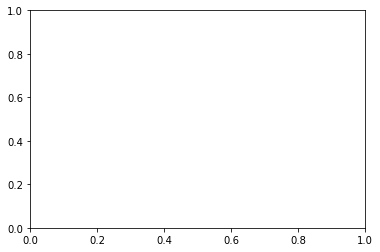

In [674]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    X = dfs2[1].drop(['classification'], axis=1).values
    y = dfs2[1]['classification'].values  
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel=' + str(kernel))

In [704]:
nu = [.5]
kernel = ['linear', 'rbf']
gamma = ['scale', 'auto', 1,0.1,0.001]
ws = [{0:75,1:25}, {0:76,1:24}, {0:77,1:23},{0:74.5,1:25.5}]
for theW in ws:
    for theC in nu:
        for theG in gamma:
            for theKern in kernel:
                X = top10.drop(['classification'], axis=1).values
                y = top10['classification'].values
                x_train_val = top10dev.drop(['classification'], axis=1).values
                y_train_val = top10dev['classification'].values         
                score = simple_svmNonLin_classify2(X, y, x_train_val, y_train_val, "also best I hope", w = theW, NU = theC, kern = theKern, gam = theG)

SVM Accuracy Score with also best I hope model/features 0.5925414364640884 {0: 75, 1: 25} 0.5 linear 3 scale
SVM Accuracy Score with also best I hope model/features 0.574585635359116 {0: 75, 1: 25} 0.5 rbf 3 scale
SVM Accuracy Score with also best I hope model/features 0.5925414364640884 {0: 75, 1: 25} 0.5 linear 3 auto
SVM Accuracy Score with also best I hope model/features 0.5732044198895028 {0: 75, 1: 25} 0.5 rbf 3 auto
SVM Accuracy Score with also best I hope model/features 0.5925414364640884 {0: 75, 1: 25} 0.5 linear 3 1
SVM Accuracy Score with also best I hope model/features 0.5759668508287292 {0: 75, 1: 25} 0.5 rbf 3 1
SVM Accuracy Score with also best I hope model/features 0.5925414364640884 {0: 75, 1: 25} 0.5 linear 3 0.1
SVM Accuracy Score with also best I hope model/features 0.5732044198895028 {0: 75, 1: 25} 0.5 rbf 3 0.1
SVM Accuracy Score with also best I hope model/features 0.5925414364640884 {0: 75, 1: 25} 0.5 linear 3 0.001
SVM Accuracy Score with also best I hope model

In [707]:
ws = [{0:75,1:25}, {0:76,1:24}, {0:77,1:23},{0:74.5,1:25.5},{0:1,1:1}]
Cvals = [10**(-1),.5, 1,1.25, 1.5, 2, 5, 10]
dual = [True,False]

for theW in ws:
    for theC in Cvals:
        for theD in dual:
            X = top10.drop(['classification'], axis=1).values
            y = top10['classification'].values
            x_train_val = top10dev.drop(['classification'], axis=1).values
            y_train_val = top10dev['classification'].values    
            score = simple_svmLin_classify2(X, y, x_train_val, y_train_val, "best_I_hope", w = theW, _C = theC,dua=theD)


SVM Accuracy Score with best_I_hope model/features 0.6961325966850829
SVM Accuracy Score with best_I_hope model/features 0.6961325966850829
SVM Accuracy Score with best_I_hope model/features 0.7002762430939227
SVM Accuracy Score with best_I_hope model/features 0.7002762430939227
SVM Accuracy Score with best_I_hope model/features 0.7016574585635359
SVM Accuracy Score with best_I_hope model/features 0.7002762430939227
SVM Accuracy Score with best_I_hope model/features 0.7002762430939227
SVM Accuracy Score with best_I_hope model/features 0.6988950276243094
SVM Accuracy Score with best_I_hope model/features 0.6602209944751382
SVM Accuracy Score with best_I_hope model/features 0.6988950276243094
SVM Accuracy Score with best_I_hope model/features 0.6933701657458563
SVM Accuracy Score with best_I_hope model/features 0.7002762430939227
SVM Accuracy Score with best_I_hope model/features 0.6284530386740331
SVM Accuracy Score with best_I_hope model/features 0.7002762430939227
SVM Accuracy Score w

In [711]:
X = top10.drop(['classification'], axis=1).values
y = top10['classification'].values
x_train_val = top10dev.drop(['classification'], axis=1).values
y_train_val = top10dev['classification'].values 
model1 = tuned_svm_classify2(X, y, x_train_val, y_train_val, "best_I_hope", w = {0:76,1:24}, _C = 10,gam = 1, kern = 'rbf')
model2 = tuned_svm_classify2(X, y, x_train_val, y_train_val, "best_I_hope",w = {0:76,1:24}, _C = 5,gam = 1, kern = 'rbf')
model3 = tuned_svm_classify2(X, y, x_train_val, y_train_val, "best_I_hope",w = {0:75,1:25}, _C = 10,gam = 1, kern = 'rbf')
model4 = tuned_svm_classify2(X, y, x_train_val, y_train_val, "best_I_hope", w = {0:75,1:25}, _C = .5,gam = 1, kern = 'poly')
model5 = tuned_svm_classify2(X, y, x_train_val, y_train_val, "best_I_hope", w = {0:76,1:24}, _C = 2)

y_pred1 = model1.predict(x_train_val)
y_pred2 = model2.predict(x_train_val)
y_pred3 = model3.predict(x_train_val)
y_pred4 = model4.predict(x_train_val)
y_pred5 = model5.predict(x_train_val)

SVM Accuracy Score with best_I_hope model/features 0.7265193370165746 {0: 76, 1: 24} 10 1 rbf
SVM Accuracy Score with best_I_hope model/features 0.7265193370165746 {0: 76, 1: 24} 5 1 rbf
SVM Accuracy Score with best_I_hope model/features 0.7237569060773481 {0: 75, 1: 25} 10 1 rbf
SVM Accuracy Score with best_I_hope model/features 0.7251381215469613 {0: 75, 1: 25} 0.5 1 poly
SVM Accuracy Score with best_I_hope model/features 0.7223756906077348 {0: 76, 1: 24} 2 scale rbf


,lst1Title,lst2Title,lst3Title
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,0,0,0
...,...,...,...
719,1,1,1
720,0,0,0
721,1,1,1
722,1,1,1
